tasks:  
take colour colour plots produced and see how RMS survey cuts would affect them

10th

RMS colour/colour cuts only give the simulation as an MYSO is significant smoothing is applied to the spectra (~7.5+ sigma width on the gaussian smoothing) this is because the RMS criteria expect a smoothly increasing flux from 1-100 microns (F8\<F14\<F21).  
This is compounded by the strong 10 micron absorbtion feature seen in the SEDs but smoothing over a sgnificant range gives back a flux smoothing increasing with wavelength for the blue half of the SED.

Now using seaborn package for plotting (import seaborn) figures look sooo much nicer

Populating the interactive namespace from numpy and matplotlib


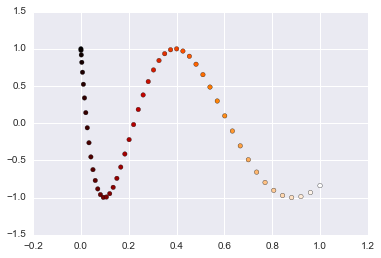

In [4]:
import seaborn
%pylab inline
scatter(linspace(0,1)**2, cos(linspace(0,10)), c=linspace(0,1), cmap=cm.gist_heat)